In [45]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import scipy.stats as st
import random
from scipy.signal import windows,freqz
from scipy import signal, fft
%run Functions.ipynb

In [46]:
sigma = 1
# lengths = [100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000]
lengths = [100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]
estimates = []
deltas = [1.3,1.4,1.5, 1.51, 1.75]
for delta in deltas:
    estimate = []
    for length in lengths:
        bandwidth = length**(-3/4)
        K = int(2*bandwidth*length-math.log(length)**2/20)
        wins, eigvals = windows.dpss(M = length, NW = bandwidth*length, Kmax = K, return_ratios=True)

        freqErrors = []
        for i in range(100):
            noise = Noise(length, 'Gaussian')
            if delta == 1.51:
                gridSize = 5*int(length**(1.5)*math.log(length)/math.log(10)/5)
            else:
                gridSize = 5*int(length**(delta)/5)
            amp = 10
            freq = 0.2 + random.random()/10
            y = noise.linearProcess([1])
            signalSample = y.copy()-np.mean(y)

            signalSample = (amp*np.cos(2*np.pi*np.arange(length)*(freq)+2)+y) 
            signalSample = np.array(signalSample)
            signalSample -= np.average(signalSample)

            max_fstat, argmax_freq = get_waveShapeFStat(signalSample, gridSize, bandwidth, 1/2-bandwidth, sigma)            
            signalSample = remove_waveShape(signalSample, wins, argmax_freq, sigma)
            
            avgSdf = np.zeros(int(length/2)+1)
            for i in range(len(wins)):
                temp, sdfWin = signal.periodogram(signalSample, window = wins[i])
                avgSdf = avgSdf + sdfWin
            avgSdf /= len(wins)
            freqErrors.append(avgSdf[int(0.2*length)-1]/2)

        estimate.append(np.mean(freqErrors))
    estimates.append(estimate)

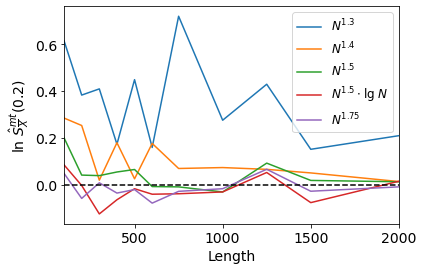

In [47]:
plt.figure(figsize=(6, 4))
for estimate in estimates:
    plt.plot(lengths, np.log(estimate))
plt.xlabel('Length')
plt.ylabel('ln $\hat{S}^{mt}_{\overline{X}}(0.2)$')
plt.xlim([lengths[0],lengths[-1]])
plt.rcParams['font.size'] = '14'
plt.legend(['$N^{1.3}$', '$N^{1.4}$', '$N^{1.5}$', '$N^{1.5}\cdot \lg\,N$', '$N^{1.75}$'], loc='upper right', prop=dict(size=12))
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.axhline(y=np.log(1), color= 'k', linestyle='--', alpha=1)
plt.show()

In [48]:
sigma = 1
# lengths = [100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000]
lengths = [100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]
estimates = []
deltas = [1.3,1.4,1.5, 1.51, 1.75]
for delta in deltas:
    estimate = []
    for length in lengths:
        bandwidth = length**(-3/4)
        K = int(2*bandwidth*length-math.log(length)**2/20)
        wins, eigvals = windows.dpss(M = length, NW = bandwidth*length, Kmax = K, return_ratios=True)

        freqErrors = []
        for i in range(100):
            noise = Noise(length, 'Lomax')
            if delta == 1.51:
                gridSize = 5*int(length**(1.5)*math.log(length)/math.log(10)/5)
            else:
                gridSize = 5*int(length**(delta)/5)
            amp = 10
            freq = 0.2 + random.random()/10
            y = noise.AR([0.75, -0.5, 0, 0])
            signalSample = y.copy()-np.mean(y)

            signalSample = (amp*np.cos(2*np.pi*np.arange(length)*(freq)+2)+y) 
            signalSample = np.array(signalSample)
            signalSample -= np.average(signalSample)

            max_fstat, argmax_freq = get_waveShapeFStat(signalSample, gridSize, bandwidth, 1/2-bandwidth, sigma)            
            signalSample = remove_waveShape(signalSample, wins, argmax_freq, sigma)
            
            avgSdf = np.zeros(int(length/2)+1)
            for i in range(len(wins)):
                temp, sdfWin = signal.periodogram(signalSample, window = wins[i])
                avgSdf = avgSdf + sdfWin
            avgSdf /= len(wins)
            freqErrors.append(avgSdf[int(0.2*length)-1]/2)

        estimate.append(np.mean(freqErrors))
    estimates.append(estimate)

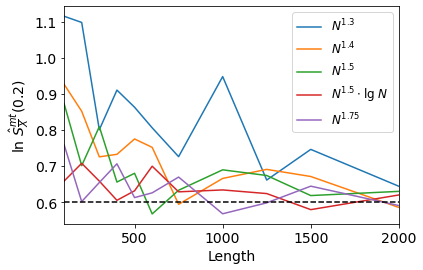

In [49]:
plt.figure(figsize=(6, 4))
for estimate in estimates:
    plt.plot(lengths, np.log(estimate))
plt.xlabel('Length')
plt.ylabel('ln $\hat{S}^{mt}_{\overline{X}}(0.2)$')
plt.xlim([lengths[0],lengths[-1]])
plt.rcParams['font.size'] = '14'
plt.legend(['$N^{1.3}$', '$N^{1.4}$', '$N^{1.5}$', '$N^{1.5}\cdot \lg\,N$', '$N^{1.75}$'], loc='upper right', prop=dict(size=12))
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.axhline(y=np.log(1.825), color= 'k', linestyle='--', alpha=1)
plt.show()